<a href="https://colab.research.google.com/github/Vishal-2001-cybthon/placement_prediction_and_analysis_system/blob/main/Placement_Prediction_and_Analysis_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connect to SQL**

In [282]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('my_database.db')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/Job_placement.csv')

# Write the DataFrame to a SQL table
df.to_sql('Job_placement', conn, if_exists='replace', index=False)

# Close the connection
conn.close()


In [ ]:
conn = sqlite3.connect('my_database.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a SQL query to fetch data from the table
cursor.execute('SELECT * FROM Job_placement')

# Fetch all rows from the result set
rows = cursor.fetchall()

# Print or examine the fetched data
for row in rows:
    print(row)

# Close the cursor and connection
cursor.close()
conn.close()


# **Placement Prediction and Analysis System**

# **Importing Libraries**


In [284]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# **Choose Dataset file from Local Directory**

In [285]:
from google.colab import files
uploaded = files.upload()

# **Load Dataset from DB**

In [287]:

# Connect to SQLite database
conn = sqlite3.connect('my_database.db')

# Read data from SQL database into a DataFrame
query = "SELECT * FROM Job_placement"  # Replace 'table_name' with the name of your table
dataset = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Export DataFrame to CSV
dataset.to_csv('exported_data.csv', index=False)

print('Data exported to CSV successfully.')


Data exported to CSV successfully.


In [290]:
dataset = pd.read_csv('/content/exported_data.csv')

Below Step (Optional)
If rename requires

In [ ]:
import pandas as pd

a,b,c,d,e,f,g=(dataset.rename(columns={'10th Percentage': 'Tenth_Percentage'}, inplace=True),
dataset.rename(columns={'12th Percentage': 'Twelfth_Percentage'}, inplace=True),
dataset.rename(columns={'College Tier': 'College_Tier'}, inplace=True),
dataset.rename(columns={'UG Percentage': 'UG_Percentage'}, inplace=True),
dataset.rename(columns={'DS & Alg(Knowledge)': 'DS_Alg_Knowledge'}, inplace=True),
dataset.rename(columns={'Placed_It': 'Placed_IT'}, inplace=True),
dataset.rename(columns={'Shortlisted_for_Interview': 'Shortlisted_for_Interview'}, inplace=True))
xx=a,b,c,d,e,f,g
# Replace 'old_column_name' with the current column name and 'new_column_name' with the new column name
for i in xx:
# Save the updated DataFrame back to your dataset file
   dataset.to_csv('/content/exported_data.csv', index=False)

# Confirm the changes
   print("Dataset updated successfully.")

In [292]:
dataset

,No,Tenth_Percentage,Twelfth_Percentage,College_Tier,Degree,Subjects,UG_Percentage,Internship,Shortlisted_for_Interview,Aptitude_Perc,DS_Alg_Knowledge,Projects,Placed_IT
0,1,74,56,tier3,B.E,CSE,92,No,Yes,60,Novice,No,No
1,2,81,86,tier2,BTech,ECE,61,Ongoing,No,0,Intermediate,Yes,No
2,3,70,83,tier2,B.E,MECH,79,No,Yes,40,Intermediate,No,No
3,4,87,63,tier3,B.E,CIVIL,95,Yes,Yes,88,Intermediate,No,No
4,5,90,93,tier1,BTech,CIVIL,83,Yes,Yes,57,Intermediate,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995,82,69,tier3,BTech,IT,93,Ongoing,Yes,74,Novice,Yes,No
1995,1996,98,72,tier3,B.E,ECE,62,Ongoing,No,0,Intermediate,No,No
1996,1997,94,72,tier3,B.E,ECE,74,No,No,0,Advanced,No,No
1997,1998,68,76,tier3,BTech,ECE,75,No,No,0,Novice,No,No


# **Summarize Dataset**

In [293]:
print("Columns, Rows \n", dataset.shape, "\n")
print(dataset.head(5))

Columns, Rows 
 (1999, 13) 

   No  Tenth_Percentage  Twelfth_Percentage College_Tier Degree Subjects  \
0   1                74                  56        tier3    B.E      CSE   
1   2                81                  86        tier2  BTech      ECE   
2   3                70                  83        tier2    B.E     MECH   
3   4                87                  63        tier3    B.E    CIVIL   
4   5                90                  93        tier1  BTech    CIVIL   

   UG_Percentage Internship Shortlisted_for_Interview  Aptitude_Perc  \
0             92         No                       Yes             60   
1             61    Ongoing                        No              0   
2             79         No                       Yes             40   
3             95        Yes                       Yes             88   
4             83        Yes                       Yes             57   

  DS_Alg_Knowledge Projects Placed_IT  
0           Novice       No        No  
1

In [294]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   No                         1999 non-null   int64 
 1   Tenth_Percentage           1999 non-null   int64 
 2   Twelfth_Percentage         1999 non-null   int64 
 3   College_Tier               1999 non-null   object
 4   Degree                     1999 non-null   object
 5   Subjects                   1999 non-null   object
 6   UG_Percentage              1999 non-null   int64 
 7   Internship                 1999 non-null   object
 8   Shortlisted_for_Interview  1999 non-null   object
 9   Aptitude_Perc              1999 non-null   int64 
 10  DS_Alg_Knowledge           1999 non-null   object
 11  Projects                   1999 non-null   object
 12  Placed_IT                  1999 non-null   object
dtypes: int64(5), object(8)
memory usage: 203.1+ KB


In [295]:
dataset.describe()

,No,Tenth_Percentage,Twelfth_Percentage,UG_Percentage,Aptitude_Perc
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1000.000000,81.977989,75.212106,77.535768,38.086043
std,577.205914,9.662499,12.167419,10.420181,36.025969
min,1.000000,66.000000,55.000000,60.000000,0.000000
25%,500.500000,73.500000,64.000000,69.000000,0.000000
50%,1000.000000,82.000000,75.000000,78.000000,43.000000
75%,1499.500000,91.000000,86.000000,86.000000,71.000000
max,1999.000000,98.000000,96.000000,95.000000,100.000000


# **Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)**

In [296]:
# The DataFrame is named dataset and the column containing the target values is named 'target'

# Replace 'No' with 0 and 'Yes' with 1
dataset['Placed_IT'] = dataset['Placed_IT'].replace({'No': 0, 'Yes': 1})
#dataset['College Tier']=dataset['College Tier'].replace({'tier1':1,'tier2':2,'tier3':3})
#dataset['Degree']=dataset['Degree'].replace({'B.E':1,'BTech':2})
#dataset['Subjects']=dataset['Subjects'].replace({'CSE':1,'IT':2,'EEE':3,'ECE':4,'MECH':5,'CIVIL':6,'DS&AI':7})
dataset['Internship']=dataset['Internship'].replace({'Yes':1,'No':2,'Ongoing':3})
dataset['Shortlisted_for_Interview']=dataset['Shortlisted_for_Interview'].replace({'No': 0, 'Yes': 1})
dataset['DS_Alg_Knowledge']=dataset['DS_Alg_Knowledge'].replace({'Advanced':1,'Intermediate':2,'Novice':3})
dataset['Projects'] = dataset['Projects'].replace({'No': 0, 'Yes': 1})
# Now the 'target' column will have 0s and 1s instead of 'No' and 'Yes'


# **Another Method to replce categorical variable to Numerical variable**

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#dataset['College Tier']=le.fit_transform(dataset['College Tier'])
#dataset['Degree']=le.fit_transform(dataset['Degree'])
#dataset['Subjects']=le.fit_transform(dataset['Subjects'])
#dataset['Internship']=le.fit_transform(dataset['Internship'])
#dataset['Shortlisted_for_Interview ']=le.fit_transform(dataset['Shortlisted_for_Interview '])
#dataset['DS & Alg(Knowledge)']=le.fit_transform(dataset['DS & Alg(Knowledge)'])
#dataset['Projects']=le.fit_transform(dataset['Projects'])

# **Convert To array**

In [297]:
X=dataset.iloc[:,6:-1].values
X

array([[92,  2,  1, 60,  3,  0],
       [61,  3,  0,  0,  2,  1],
       [79,  2,  1, 40,  2,  0],
       ...,
       [74,  2,  0,  0,  1,  0],
       [75,  2,  0,  0,  3,  0],
       [64,  3,  0,  0,  1,  0]])

In [299]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 0, 0, 0])

# **📊EDA**

# **Bar Chart (Plot)**

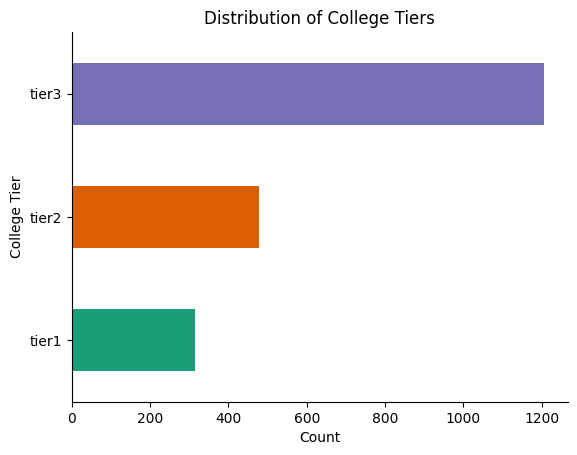

In [300]:
dataset.groupby('College_Tier').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Count')
plt.ylabel('College Tier')
plt.title('Distribution of College Tiers')
plt.gca().spines[['top', 'right',]].set_visible(False)

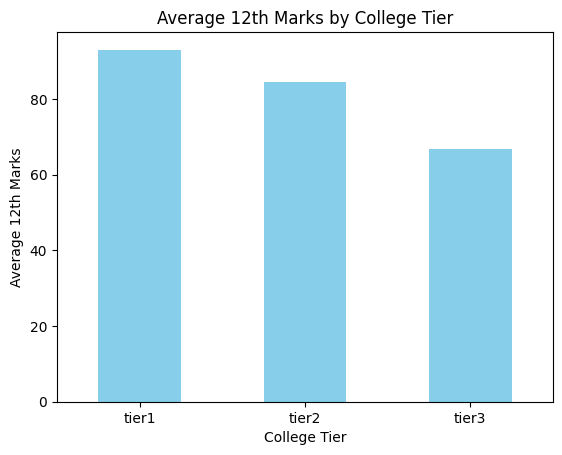

In [301]:
# Calculate average 12th marks for each college tier
avg_12th_marks_by_tier = dataset.groupby('College_Tier')['Twelfth_Percentage'].mean()

# Plotting
avg_12th_marks_by_tier.plot(kind='bar', color='skyblue')
plt.xlabel('College Tier')
plt.ylabel('Average 12th Marks')
plt.title('Average 12th Marks by College Tier')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


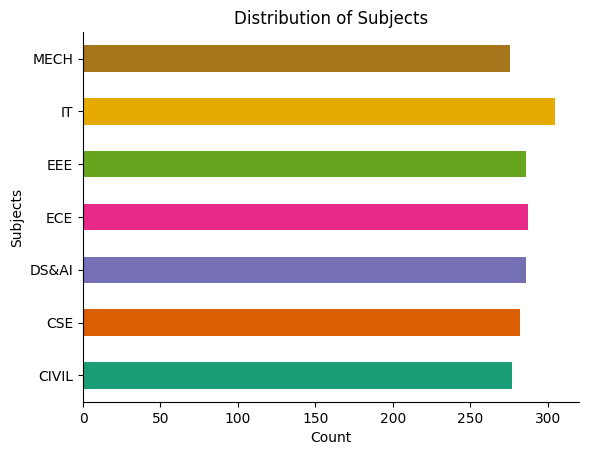

In [303]:
# Grouping by subjects and getting the count
subject_counts = dataset.groupby('Subjects').size()

# Plotting horizontal bar chart
subject_counts.plot(kind='barh', color=sns.color_palette('Dark2'))
plt.xlabel('Count')
plt.ylabel('Subjects')
plt.title('Distribution of Subjects')
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide top and right spines
plt.show()

# **count plot**

<ipython-input-304-a722a4aa2e10>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




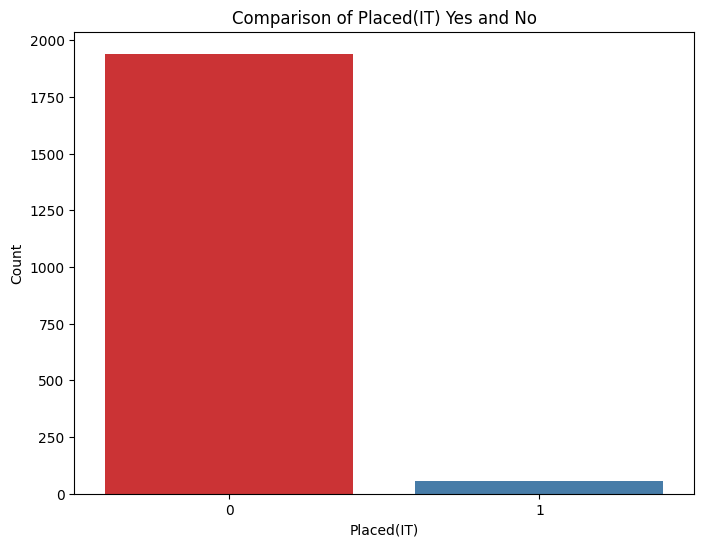

In [304]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Placed_IT', palette='Set1')
plt.title('Comparison of Placed(IT) Yes and No')
plt.xlabel('Placed(IT)')
plt.ylabel('Count')
plt.show()

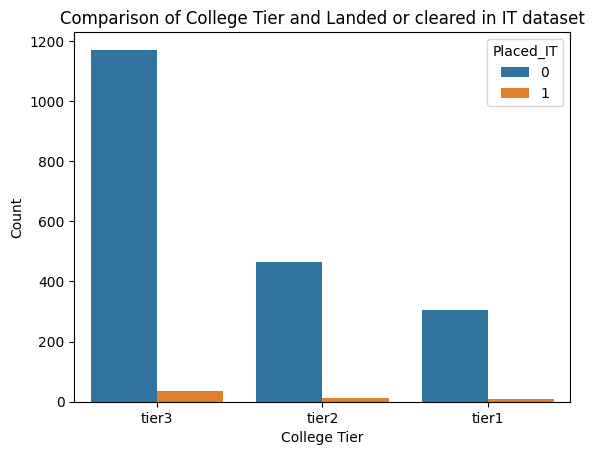

In [305]:
sns.countplot(x='College_Tier', hue='Placed_IT', data=dataset)
plt.xlabel('College Tier')
plt.ylabel('Count')
plt.title('Comparison of College Tier and Landed or cleared in IT dataset')
plt.show()


# **cross-tabulation plot (Heatmap)**


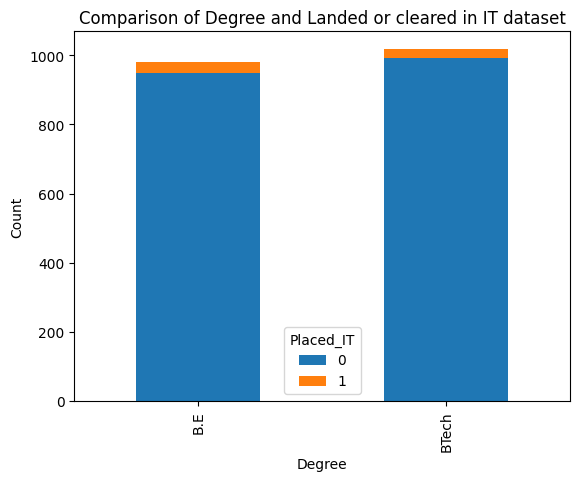

In [306]:
cross_tab = pd.crosstab(dataset['Degree'], dataset['Placed_IT'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Comparison of Degree and Landed or cleared in IT dataset')
plt.show()


# **Scatter Plot**

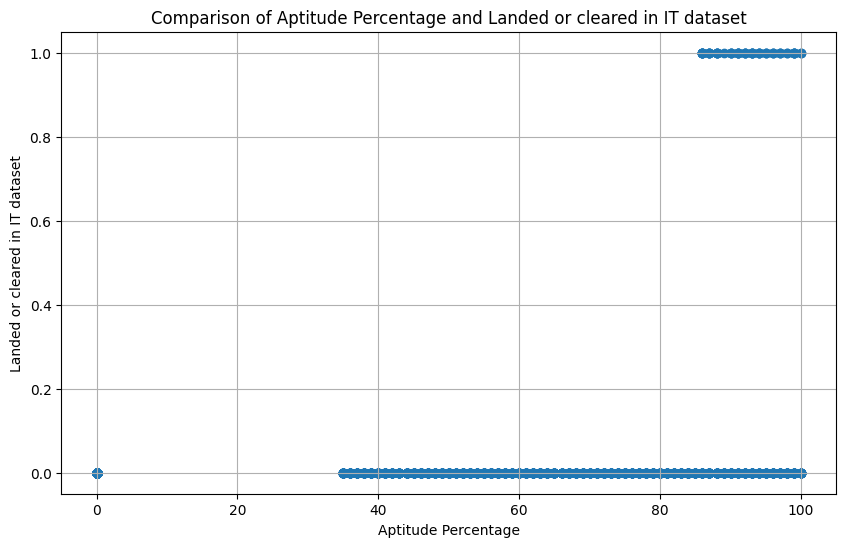

In [307]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Aptitude_Perc'], dataset['Placed_IT'])
plt.xlabel('Aptitude Percentage')
plt.ylabel('Landed or cleared in IT dataset')
plt.title('Comparison of Aptitude Percentage and Landed or cleared in IT dataset')
plt.grid(True)
plt.show()

# **Histogram plot**

In [308]:
import plotly.express as px

fig = px.histogram(dataset, x='Subjects', color='Placed_IT', barmode='group')
fig.update_layout(title='Comparison of Subjects and Placement in IT dataset', xaxis_title='Subject', yaxis_title='Count')
fig.show()



# **Scatter Plot using Plotly**


In [309]:
import plotly.express as px

# UG Percentage vs Shortlisted using Plotly
fig_ug = px.scatter(dataset, x='UG_Percentage', y='Shortlisted_for_Interview', color='Shortlisted_for_Interview',
                    title='Comparison of UG Percentage and Shortlisted for Interview',
                    labels={'UG Percentage': 'UG Percentage', 'Shortlisted_for_Interview ': 'Shortlisted_for_Interview'})
fig_ug.show()

# ***Splitting Dataset into Train & Test***

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

### *Feature Scaling*
### we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
###Transform - Transform method is transforming all the features using the respective mean and variance,
###We want our test data to be a completely new and a surprise set for our model

In [324]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Model Training**

In [325]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve


# **Prediction for all Test Data using multiple modules**

### *Evaluating Model - CONFUSION MATRIX*
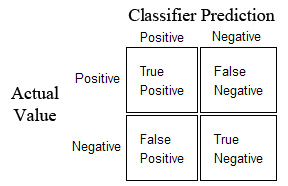

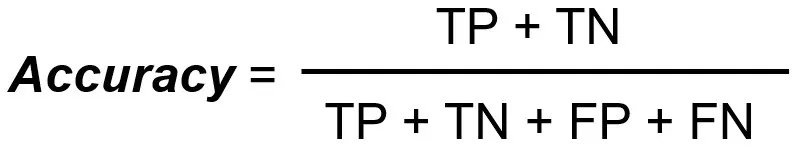

In [332]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000, penalty='l2'),# Add regularization
    "Decision Tree" :DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='gini'),
    "Random Forest":RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1),
    "Support Vector Machine": svm.SVC(C=1, kernel='rbf', gamma='scale', degree=3),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean'),
}
test_values=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train Model
    model_name=list(models.keys())[i]

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)
    Predict=np.concatenate((y_test_pred.reshape(len(y_test_pred),1), y_test.reshape(len(y_test),1)),1)
    #ab=pd.DataFrame(data=Predict,columns=["Actual","Predicted"])
    #print(ab)
    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)*100
    test_values.append(model_test_accuracy)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')*100
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')*100
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')*100

  # Training set performance
    #model_train_accuracy = accuracy_score(y_train, y_train_pred)*100
    #model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')*100
    #model_train_precision = precision_score(y_train, y_train_pred,average='weighted')*100
    #model_train_recall = recall_score(y_train, y_train_pred,average='weighted')*100
    #print(list(models.keys())[i])

    #print('Model performance for Training set')
    #print("- Accuracy: {:.4f}".format(model_train_accuracy))
    #print('- F1 score: {:4f}'.format(model_train_f1))
    #print('- Precision: {:4f}'.format(model_train_precision))
    #print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set:', model_name)
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')


----------------------------------
Model performance for Test set: Logisitic Regression
- Accuracy: 98.0000
- Fl score: 98.3897
- Precision: 99.1429
- Recall: 98.0000


----------------------------------
Model performance for Test set: Decision Tree
- Accuracy: 100.0000
- Fl score: 100.0000
- Precision: 100.0000
- Recall: 100.0000


----------------------------------
Model performance for Test set: Random Forest
- Accuracy: 100.0000
- Fl score: 100.0000
- Precision: 100.0000
- Recall: 100.0000


----------------------------------
Model performance for Test set: Support Vector Machine
- Accuracy: 99.0000
- Fl score: 98.7525
- Precision: 99.0101
- Recall: 99.0000


----------------------------------
Model performance for Test set: K-Nearest Neighbors
- Accuracy: 99.5000
- Fl score: 99.4506
- Precision: 99.5025
- Recall: 99.5000




# **Predicting the model with a new candidate value**

In [338]:
# Get input data from user
Tenth_Percentage = int(input("Enter your Tenth Percentage: "))
Twelfth_Percentage = int(input("Enter your Twelfth Percentage: "))
College_Tier = input("Enter your College Tier (tier1:1, tier2:2, tier3:3): ")
Degree = input("Enter your Degree (B.E:1, BTech:2): ")
Subjects = input("Enter your Subject (CSE:1, IT:2, EEE:3, ECE:4, MECH:5, CIVIL:6, DS&AI:7): ")
UG_Percentage = int(input("Enter your UG Percentage: "))

if UG_Percentage <= 75:
    print("Sorry, You are not shortlisted for the further process")
else:
    Shortlisted_for_Interview = 1
    Internship = int(input("Enter your Internship status (Yes:1, No:2, Ongoing:3): "))
    Aptitude_Perc = int(input("Enter your Aptitude Percentage: "))
    DS_and_Alg_Klg = int(input("Enter your Knowledge of DS & Algorithms (Advanced:1, Intermediate:2, Novice:3): "))
    Projects = int(input("Enter if Projects are available (Yes:1, No:0): "))

    # Predict the result using your model and scaler
    NewCandidate = [[UG_Percentage, Internship, Shortlisted_for_Interview, Aptitude_Perc, DS_and_Alg_Klg, Projects]]
    result = model.predict(sc.transform(NewCandidate))
    Result=int(result)


# Connect to SQLite database
conn = sqlite3.connect('my_database.db')

# Function to insert new candidate data into the database
def insert_new_candidate(Tenth_Percentage, Twelfth_Percentage, College_Tier, Degree, Subjects, UG_Percentage, Internship, Shortlisted_for_Interview, Aptitude_Perc, DS_and_Alg_Klg, Projects, Result):
    Shortlisted_for_Interview = "Yes" if Shortlisted_for_Interview == 1 else "No"
    Internship = "Yes" if Internship == 1 else "No" if Internship == 2 else "Ongoing"
    DS_and_Alg_Klg = "Advanced" if DS_and_Alg_Klg == 1 else "Novice" if DS_and_Alg_Klg == 3 else "Intermediate"
    Projects = "Yes" if Projects == 1 else "No"
    Result= "Yes" if Result == 1 else "No"
    cursor = conn.cursor()
    cursor.execute("INSERT INTO Job_placement (Tenth_Percentage, Twelfth_Percentage, College_Tier, Degree, Subjects, UG_Percentage, Internship, Shortlisted_for_Interview, Aptitude_Perc, DS_Alg_Knowledge, Projects, Placed_IT) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)",
                   (Tenth_Percentage, Twelfth_Percentage, College_Tier, Degree, Subjects, UG_Percentage, Internship, Shortlisted_for_Interview, Aptitude_Perc, DS_and_Alg_Klg, Projects, Result))
    conn.commit()

# Function to export dataset from SQL database to CSV file
def export_dataset_to_csv():
    query = "SELECT * FROM Job_placement"  # Replace 'table_name' with the name of your table
    df = pd.read_sql_query(query, conn)
    df.to_csv('/content/exported_data.csv', index=False)
    print('Dataset exported to CSV successfully.')

# Insert new candidate data into the database
insert_new_candidate(Tenth_Percentage, Twelfth_Percentage, College_Tier, Degree, Subjects, UG_Percentage, Internship, Shortlisted_for_Interview, Aptitude_Perc, DS_and_Alg_Klg, Projects, result)

# Export updated dataset to CSV
export_dataset_to_csv()

# Close the database connection
conn.close()


Enter your Tenth Percentage: 98
Enter your Twelfth Percentage: 85
Enter your College Tier (tier1:1, tier2:2, tier3:3): tier2
Enter your Degree (B.E:1, BTech:2): BTech
Enter your Subject (CSE:1, IT:2, EEE:3, ECE:4, MECH:5, CIVIL:6, DS&AI:7): MECH
Enter your UG Percentage: 85
Enter your Internship status (Yes:1, No:2, Ongoing:3): 1
Enter your Aptitude Percentage: 98
Enter your Knowledge of DS & Algorithms (Advanced:1, Intermediate:2, Novice:3): 1
Enter if Projects are available (Yes:1, No:0): 1
Dataset exported to CSV successfully.


<ipython-input-338-4a38455357f6>:21: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [339]:
if Result == 1:
      print('\033[1m' + '\033[92m' +"He got placed")
else:
      print('\033[1m' + '\033[91m' + "He won't get placed")

He got placed


#  **Comparitive Analysis of Models and Accuracy**

In [340]:
import plotly.express as px

test_values
model =list(models.keys())

data = {'model': model, 'test_values': test_values}
df = pd.DataFrame(data)

fig = px.histogram(df,x='model', y='test_values', color='model', barmode='group')
fig.update_layout(title='Comparison of Models and Test Accuracy', xaxis_title='Model', yaxis_title='Test Accuracy')
fig.show()
